# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

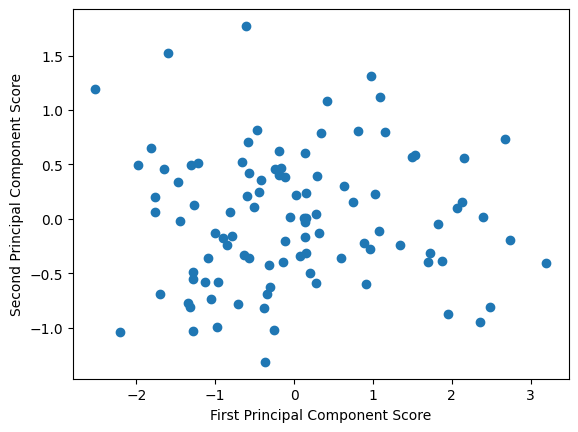

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.


First 5 rows of the dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  

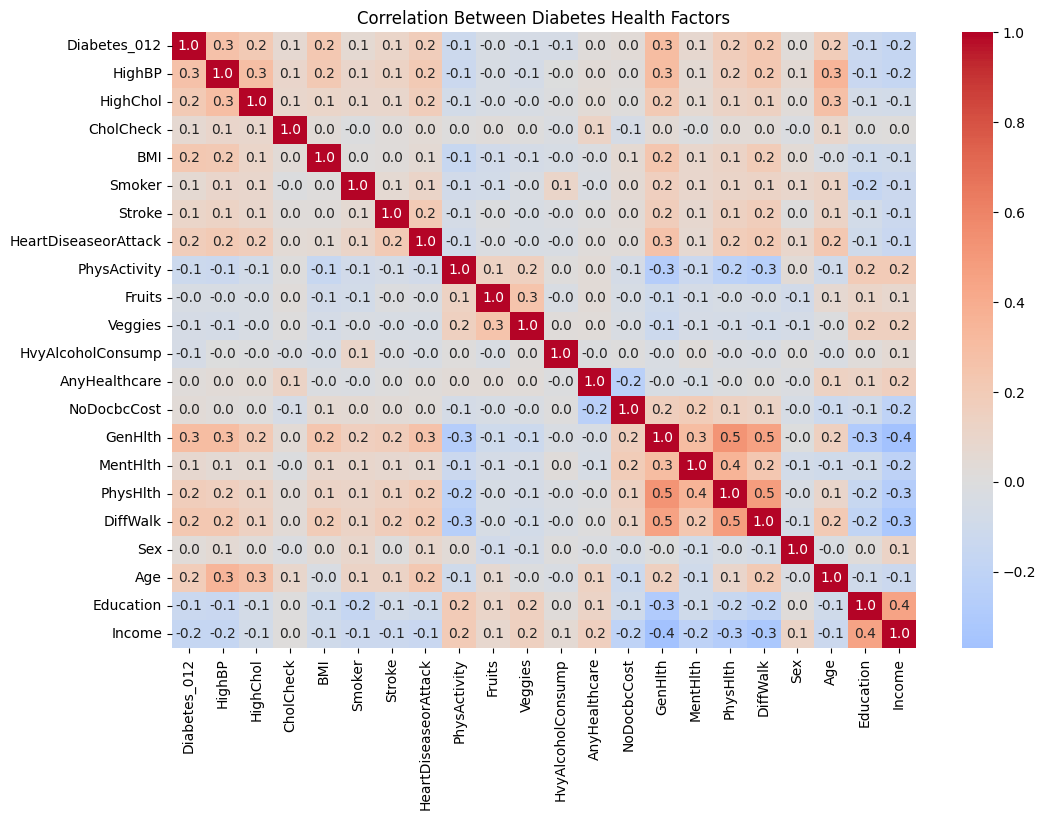

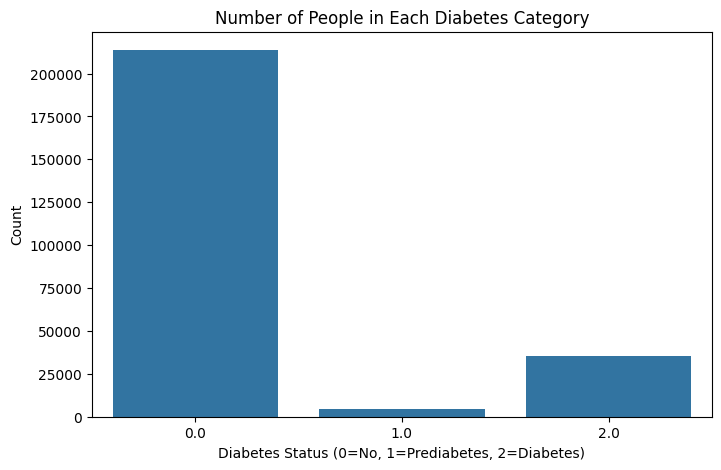

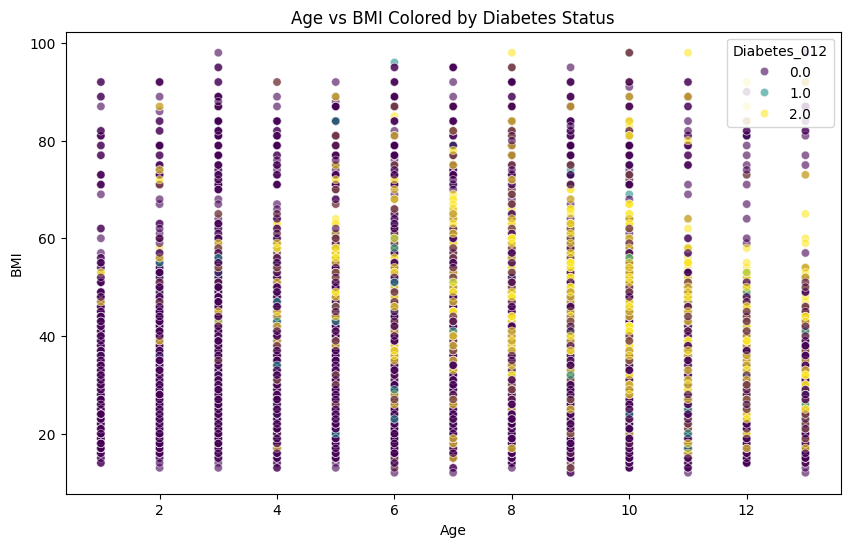

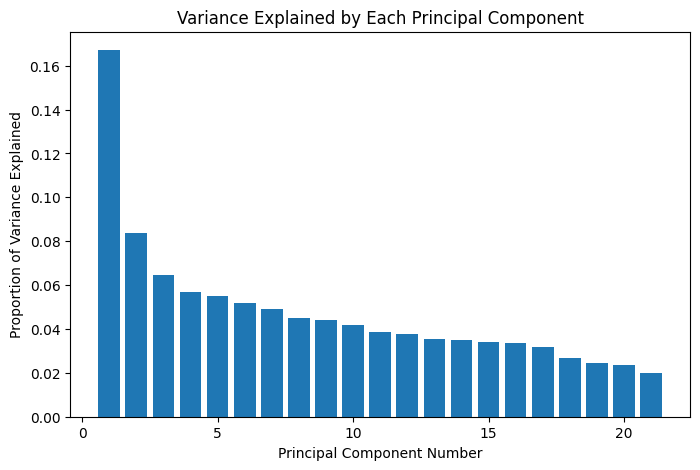


Variance captured by first PC: 16.7%
Variance captured by first 2 PCs: 25.1%


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Performance with Different Feature Sets:

Model 1:
Features: HighBP, HighChol, BMI
Accuracy: 84.3%

Model 2:
Features: GenHlth, Age, Income
Accuracy: 84.0%

Model 3:
Features: HighBP, BMI, Age, GenHlth
Accuracy: 84.5%

Found 83444 potential outliers (values more than 3 standard deviations from mean):
    Diabetes_012   BMI  Age  GenHlth
1            0.0  25.0  7.0      3.0
2            0.0  28.0  9.0      5.0
8            2.0  30.0  9.0      5.0
14           0.0  33.0  4.0      4.0
18           0.0  23.0  2.0      2.0


In [4]:
# Import all necessary libraries at the top (good practice)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)
# Load the diabetes dataset
diabetes_data = pd.read_csv("diabetes.csv")
print("\nFirst 5 rows of the dataset:")
print(diabetes_data.head())
# Basic information about the data
print("\nDataset information:")
print(diabetes_data.info())
# Summary statistics
print("\nSummary statistics:")
print(diabetes_data.describe())

## Multivariate analysis

# 1. Heatmap to show correlations between features
plt.figure(figsize=(12, 8))
correlations = diabetes_data.corr()
sns.heatmap(correlations, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title("Correlation Between Diabetes Health Factors")
plt.show()

# 2. Countplot to show distribution of diabetes cases
plt.figure(figsize=(8, 5))
sns.countplot(x="Diabetes_012", data=diabetes_data)
plt.title("Number of People in Each Diabetes Category")
plt.xlabel("Diabetes Status (0=No, 1=Prediabetes, 2=Diabetes)")
plt.ylabel("Count")
plt.show()

# 3. Scatter plot of Age vs BMI, colored by diabetes status
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="BMI", hue="Diabetes_012", 
                data=diabetes_data, palette="viridis", alpha=0.6)
plt.title("Age vs BMI Colored by Diabetes Status")
plt.show()

## PRINCIPAL COMPONENT ANALYSIS (PCA)

numeric_features = diabetes_data.select_dtypes(include=['number'])
features_for_pca = numeric_features.drop(columns=["Diabetes_012"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_pca)
pca = PCA()
principal_components = pca.fit_transform(scaled_features)

# Plot how much variance each principal component explains
plt.figure(figsize=(8, 5))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component Number")
plt.ylabel("Proportion of Variance Explained")
plt.title("Variance Explained by Each Principal Component")
plt.show()

# Show how much variance the first 2 components capture
print(f"\nVariance captured by first PC: {pca.explained_variance_ratio_[0]:.1%}")
print(f"Variance captured by first 2 PCs: {sum(pca.explained_variance_ratio_[:2]):.1%}")

## STEP 4: PREDICT DIABETES STATUS
feature_combinations = [
    ['HighBP', 'HighChol', 'BMI'],  # Basic health metrics
    ['GenHlth', 'Age', 'Income'],   # General health and demographics
    ['HighBP', 'BMI', 'Age', 'GenHlth'],  # Combined important features
]
results = []

for features in feature_combinations:
    # Prepare data
    X = diabetes_data[features]
    y = diabetes_data['Diabetes_012']
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LogisticRegression(max_iter=1000, multi_class='multinomial')
    model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    # Save results
    results.append({
        'features': features,
        'accuracy': accuracy,
        'model': model
    })

# Display results
print("\nModel Performance with Different Feature Sets:")
for i, result in enumerate(results, 1):
    print(f"\nModel {i}:")
    print(f"Features: {', '.join(result['features'])}")
    print(f"Accuracy: {result['accuracy']:.1%}")

## STEP 5: FIND OUTLIERS

# Calculate Z-scores to find unusual data points
z_scores = np.abs((numeric_features - numeric_features.mean()) / numeric_features.std())
outliers = diabetes_data[(z_scores > 3).any(axis=1)]

print(f"\nFound {len(outliers)} potential outliers (values more than 3 standard deviations from mean):")
print(outliers[['Diabetes_012', 'BMI', 'Age', 'GenHlth']].head())

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

<Figure size 1200x600 with 0 Axes>

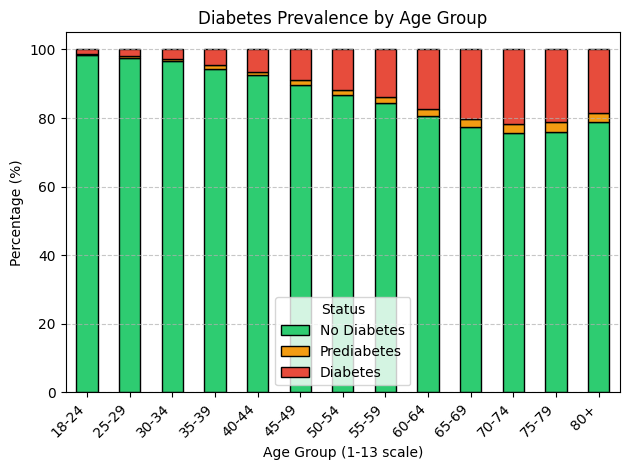

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

# Diabetes Prevalence by Age Group
plt.figure(figsize=(12, 6))

# Calculate percentage of each diabetes status by age group
age_diabetes = df.groupby('Age')['Diabetes_012'].value_counts(normalize=True).unstack() * 100
age_diabetes.plot(kind='bar', stacked=True, 
                  color=['#2ecc71', '#f39c12', '#e74c3c'],  # Green, Orange, Red
                  edgecolor='black')

plt.title('Diabetes Prevalence by Age Group')
plt.xlabel('Age Group (1-13 scale)')
plt.ylabel('Percentage (%)')
plt.legend(['No Diabetes', 'Prediabetes', 'Diabetes'], title='Status')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add age group labels (BRFSS encoding)
age_labels = [
    '18-24', '25-29', '30-34', '35-39', '40-44', 
    '45-49', '50-54', '55-59', '60-64', '65-69', 
    '70-74', '75-79', '80+'
]
plt.xticks(range(13), age_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()